In [1]:
# 텐서플로,케라스 cpu, gpu 선택을 위해 지원되는 디바이스 넘보 보기
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1322591424541553427, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5245881479033660858
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4669179197827244334
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8763649459680345641
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
# clear_output() 으로 반복문에서 길~게 나오는 로그들을 매 루프마다 지우고 새로 출력하게 한다
from IPython.display import clear_output 

# InteractiveShell 옵션에 'all'을 주면 주피터노트북의 각 셀에서 가장 마지막 줄 뿐만 아니라, 출력하도록 한 모든 값이 출력됨
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 경고가 너무 많이뜨는경우 주피터가 죽기때문에 경고메세지는 무시하도록 설정
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# Matplotlib을 시각화 모듈로 사용하지만, plot의 기본 스타일은 seaborn의 스타일을 따르도록 한다
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

# pandas 데이터프레임이 너무 긴~경우 가로, 세로 몇 줄까지 보여줄 것인지 설정
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)


In [3]:
# colab에서의 한글 폰트 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


# # matplotlib 모듈에 한글폰트 적용
# from matplotlib import font_manager, rc
# font_name = 'AppleGothic'
# rc('font', family=font_name)

# # matplotlib에서 한글 사용 시, 마이너스 기호의 폰트가 깨지는 문제를 해결하는 설정
# mpl.rcParams['axes.unicode_minus'] = False

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [0]:
 import os

def getImageFromPath(path):
    x_dir_ls = []
    img_file = []
    y_list = []
    count = 0

    for root, dirs, files in os.walk(path):
        for fname in files:
            full_fname = os.path.join(root, fname)
            # print(full_fname)
            x_dir_ls.append(full_fname)
            img_file.append(fname)
            y_list.append(fname.split("_")[0]) # 웹툰 제목을 y값인 라벨로 설정함(Y값은 파일명의 _앞에 위치한 웹툰 이름임)
            count += 1 
            if count == 2716:
              break

    # clear_output()        
    print("All image path listing complete!")
    return x_dir_ls, img_file, y_list # 각 이미지들의 경로, 이미지 파일명, y값 리스트 

# 실행예시
# path = 'D:/0_webtoon_imgs/test_dir_2'
# x_dir_ls, img_file, y_list = getImageFromPath(path)

In [5]:
from PIL import Image as pil

x_dir_ls = []
img_file = []
y_list = []

for root, dirs, files in os.walk('/content/drive/My Drive/total_img'):
    for fname in files:
        full_fname = os.path.join(root, fname)
        # print(full_fname)
        x_dir_ls.append(full_fname)
        img_file.append(fname)
        y_list.append(fname.split("_")[0]) # 웹툰 제목을 y값인 라벨로 설정함(Y값은 파일명의 _앞에 위치한 웹툰 이름임)
        break
    break
# clear_output()        
print("All image path listing complete!")
# return x_dir_ls, img_file, y_list # 각 이미지들의 경로, 이미지 파일명, y값 리스트 

# 실행예시
# path = 'D:/0_webtoon_imgs/test_dir_2'
# x_dir_ls, img_file, y_list = getImageFromPath(path)

All image path listing complete!


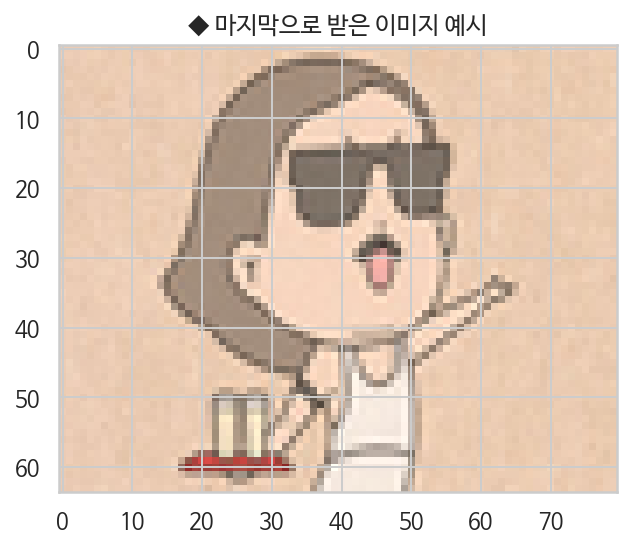

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태 ▽
(1, 64, 80, 3) float32


In [6]:
X_RGBimgs = []
graytoneimgs = []
print("이미지 처리중...")

for i in range(0,len(x_dir_ls)):

    # 미니사이즈로 학습시켜보기 resize로 이미지 크기를 축소시켜서 사용할거임
    a = pil.open(x_dir_ls[i]).resize((80, 64), pil.ANTIALIAS).convert(mode='RGB')
    
    k = np.asarray(a, dtype="uint8")
    
    X_RGBimgs.append(k)
    if i % 150 == 0:
        print(i,"/",len(x_dir_ls)," ==> ",y_list[i], x_dir_ls[i], k.shape, "completed", end='\r')
plt.figure(figsize=(5,5))
plt.imshow(a)
plt.title("◆ 마지막으로 받은 이미지 예시")
clear_output()
plt.show()

X_raw=np.asarray(X_RGBimgs)
X_raw = X_raw.astype('float32')/255.0

print("◆ 이미지 np.array화 완료!",80,"*",64,"--")
print("이미지 데이터 형태 ▽")
print(X_raw.shape, X_raw.dtype)

In [0]:
# X_raw

In [0]:
# 이미지 numpy배열화
from PIL import Image as pil

def imageToNpArray(img_path_ls, v, h, img_mode): # 이미지 path가 리스트로 있어야 가능함
    X_RGBimgs = []
    graytoneimgs = []
    print("이미지 처리중...")

    for i in range(0,len(img_path_ls)):

        # 미니사이즈로 학습시켜보기 resize로 이미지 크기를 축소시켜서 사용할거임
        a = pil.open(img_path_ls[i]).resize((v,h), pil.ANTIALIAS).convert(mode=img_mode)
        
        k = np.asarray(a, dtype="uint8")
        
        X_RGBimgs.append(k)
        if i % 150 == 0:
            print(i,"/",len(img_path_ls)," ==> ",y_list[i], img_path_ls[i], k.shape, "completed", end='\r')
    plt.figure(figsize=(5,5))
    plt.imshow(a)
    plt.title("◆ 마지막으로 받은 이미지 예시")
    clear_output()
    plt.show()

    X_raw=np.asarray(X_RGBimgs)
    X_raw = X_raw.astype('float32')/255.0  # 이거 왜 해야하는걸까?? 
    
    print("◆ 이미지 np.array화 완료!",v,"*",h,"--")
    print("이미지 데이터 형태▽")
    print(X_raw.shape, X_raw.dtype)
    
    return  X_raw, graytoneimgs

In [8]:
import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session

config = tf.compat.v1.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True       # 메모리가 더 필요한 경우 자동 증폭
config.gpu_options.per_process_gpu_memory_fraction = 1.0      # keras의 gpu 메모리 점유율 설정

tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

from keras.utils import np_utils

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



Using TensorFlow backend.


In [9]:
path = '/content/drive/My Drive/total_img'
x_dir_ls, img_file, y_list = getImageFromPath(path)

All image path listing complete!


In [10]:
len(set(y_list))

31

In [11]:
len(img_file)

2716

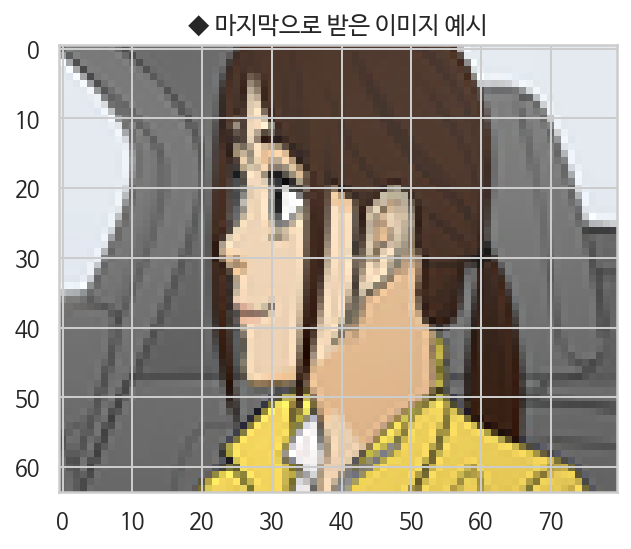

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태▽
(2716, 64, 80, 3) float32


In [14]:
X_raw, error_imgs = imageToNpArray(x_dir_ls, 80, 64, "RGB") #이미지 path 리스트, 가로px, 세로px, 이미지 모드

In [15]:
print('Y데이터형태')
print("갯수:",len(y_list),"// 카테고리",len(set(y_list)))

Y데이터형태
갯수: 2716 // 카테고리 31


In [16]:
#Y데이터 라벨링하기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = y_list
le.fit(y)
y= le.transform(y)
# y


LabelEncoder()

In [17]:
le.classes_ # 인덱스가 클래명과 대응한다 

array(['공부하는 고양이', '나 홀로 버그로 꿀빠는 플레이어',
       '남궁세가 소공자', '내일도 출근!', '냥냐라냥냥',
       '달리는 여자', '당신도 보정해 드릴까요?', '대마법사의 딸',
       '레드스톰', '멀리서 보면 푸른 봄', '바니와 오빠들',
       '반지하셋방', '버닝 이펙트',
       '별똥별이 떨어지는 그 곳에서 기다려', '세로토닌',
       '슬프게도 이게 내 인생', '씨방것들', '여의주', '요괴백정',
       '유색의 멜랑꼴리', '음란마귀지만 괜찮아!', '인생막장',
       '주말 도미 시식회', '채널뽁스', '취향저격 그녀',
       '퀴퀴한 일기', '표류감옥', '풀 뜯어먹는 소리', '풍검',
       '하렘생존기', '하필 너야?!'], dtype='<U40')

In [0]:
# 트레인 /테스트데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.05, random_state=0)

Y_train = np_utils.to_categorical(y_train, 31)
Y_test = np_utils.to_categorical(y_test, 31)

In [19]:
X_raw[0].shape

(64, 80, 3)

In [0]:
# 2. 그림사이즈 80x64으로 축소시켜서 사용할 것임. 필터수 96개
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()
filter_num = 96

model.add(Conv2D(filter_num, (3, 3), activation='relu', input_shape=(64, 80, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))       # 0.2, 0.3 0.2

model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))       # 0.2, 0.3 0.2

model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))       # 0.3, 0.3 0.4

model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))       # 0.4, 0.4 0.4

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))       # 0.5, 0.3, 0.2
model.add(Dense(31, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 80, 96)        2688      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 80, 96)        83040     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 80, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 40, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 40, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 40, 96)        83040     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 40, 96)       

In [23]:
y_train.shape

(2580,)

In [24]:
Y_train.shape

(2580, 31)

In [25]:
from keras.preprocessing.image import ImageDataGenerator

# 오그멘테이션 자료 set 만들기
print('Using Full Set augmented data')
train_generator = ImageDataGenerator(
    zoom_range=0.05,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True)

train_generator.fit(X_train)

train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

N = 5 #오그멘테이션 할 배수
print("total N : ",N)

X_train_new = []
Y_train_new = []
for i in range(N):
    print("generating...",i,end="... ")
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    print("1/2..",end=" ")
    Y_train_new.append(y_train_new)
    print("ok!!")
    
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

clear_output()
print("All data are Generated!!")
X_train_new.shape

All data are Generated!!


(12900, 64, 80, 3)

In [26]:
X_train_new[12000].shape

(64, 80, 3)

In [28]:
model.fit(X_train_new, Y_train_new, epochs=10, batch_size=60, validation_data=(X_test, Y_test), verbose=1)

Train on 12900 samples, validate on 136 samples
Epoch 1/10
12900/12900 [==============================] - 14s 1ms/step - loss: 1.9666 - accuracy: 0.7789 - val_loss: 5.1410 - val_accuracy: 0.2574
Epoch 2/10
12900/12900 [==============================] - 14s 1ms/step - loss: 1.9959 - accuracy: 0.7780 - val_loss: 3.4605 - val_accuracy: 0.5441
Epoch 3/10
12900/12900 [==============================] - 14s 1ms/step - loss: 1.9614 - accuracy: 0.7860 - val_loss: 2.3583 - val_accuracy: 0.6471
Epoch 4/10
12900/12900 [==============================] - 14s 1ms/step - loss: 1.9078 - accuracy: 0.7891 - val_loss: 4.8550 - val_accuracy: 0.3824
Epoch 5/10
12900/12900 [==============================] - 14s 1ms/step - loss: 1.8741 - accuracy: 0.7953 - val_loss: 3.8902 - val_accuracy: 0.4338
Epoch 6/10
12900/12900 [==============================] - 14s 1ms/step - loss: 1.7927 - accuracy: 0.8063 - val_loss: 4.1256 - val_accuracy: 0.3235
Epoch 7/10
12900/12900 [==============================] - 14s 1ms/step

In [29]:
%%time
#오그멘테이션 없이 학습하고자 할 경우
# hist = model.fit(X_train, Y_train, epochs=3, batch_size=50, validation_data=(X_test, Y_test), verbose=1)

CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 6.44 µs


In [0]:
#### 학습한 신경망모델 저장하기
# model.save("wbt_tmb_test2-1(epoch_500)_BN_3x3_acc_65_vacc_41.hdf5")

model.save("/content/drive/My Drive/Colab Notebooks/daum_thumbnail_model.h5")

In [0]:
# 저장한 모델 불러오기
# from keras.models import load_model

# model = load_model("/content/drive/My Drive/Colab Notebooks/daum_thumbnail_model.h5")

In [32]:
# 테스트 데이터 보기
from sklearn.metrics import *
# X_test.shape
# V_raw.shape
y_pred = model.predict(X_test,verbose=0)
print(y_pred)

[[7.2673103e-04 3.3330318e-06 7.1559472e-05 ... 2.8427539e-04
  7.7870409e-06 3.7649350e-04]
 [2.5632663e-03 7.9617043e-05 1.3723734e-03 ... 7.7836984e-04
  2.5479204e-04 4.8321854e-02]
 [7.9814022e-09 3.3043189e-13 6.2806609e-12 ... 1.5586053e-11
  8.4636039e-12 2.2009476e-11]
 ...
 [2.4561908e-10 8.5209888e-15 6.7380411e-13 ... 1.4621880e-12
  6.9682775e-15 2.0596413e-12]
 [2.4962894e-08 3.8454875e-11 9.7176966e-10 ... 5.7169651e-11
  1.2804393e-11 5.8303257e-10]
 [2.8299510e-07 2.5521893e-09 7.8808386e-14 ... 4.1453838e-03
  3.4168535e-10 2.0859705e-09]]


In [33]:
len(y_pred[0])

31

In [34]:
?# inverse_transform은 수치화된 라벨값에 대응하는 원래의 라벨 명칭을 반환한다
label_Y = le.inverse_transform(y_test)
# result_df = pd.DataFrame([label_Y,y_test[0:50]],columns=['real_wbt_id','Y_val'])
result_df = pd.DataFrame()

# 원래의 y 카테고리 명칭
result_df['id']=label_Y

# 라벨인코더로 수치화시킨 y값
result_df['Y_val']=y_test

result_df = pd.concat([result_df,pd.DataFrame(y_pred)],axis=1)
clear_output()
result_df.tail()
print("테스트 데이터 갯수 : ", y_test.size)
print("(테스트 데이터 갯수, 카테고리 갯수) : ", y_pred.shape)

,id,Y_val,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
131,채널뽁스,23,2.747520e-07,5.615551e-05,7.287537e-01,4.727650e-05,6.214880e-03,1.140876e-03,1.989170e-04,1.025636e-01,5.926712e-06,2.729341e-02,1.118292e-01,8.370518e-04,1.122833e-03,1.402360e-02,2.836617e-06,1.661139e-04,1.962762e-04,3.557010e-05,1.967772e-04,1.292170e-04,8.480350e-06,1.291313e-05,7.760753e-07,1.604675e-03,1.201036e-03,1.552505e-04,2.703989e-04,1.279109e-05,6.807750e-07,8.176538e-04,1.100726e-03
132,채널뽁스,23,7.327768e-09,3.712751e-10,1.048087e-10,2.586610e-09,3.009244e-09,8.688396e-06,6.788447e-06,5.219083e-08,1.842741e-02,1.810994e-06,2.295653e-08,9.042036e-02,2.660424e-05,1.266530e-08,6.969513e-10,1.384799e-07,2.253073e-11,1.310899e-07,3.528705e-06,5.920372e-08,1.149684e-08,1.351448e-08,4.166930e-09,8.910784e-01,7.517650e-10,5.197273e-06,3.888013e-07,2.043597e-05,5.377011e-10,4.299933e-09,1.932818e-10
133,퀴퀴한 일기,25,2.456191e-10,8.520989e-15,6.738041e-13,1.101349e-13,1.378942e-10,6.582203e-14,3.195283e-13,5.360881e-12,3.317230e-09,4.905963e-09,3.028337e-14,1.762125e-08,2.447285e-12,4.431511e-12,5.556187e-12,3.566610e-12,1.449405e-11,1.523779e-12,3.203568e-14,3.687396e-11,9.343752e-13,2.798967e-16,1.813554e-13,4.894840e-09,8.856760e-11,1.000000e+00,6.820244e-11,1.434429e-09,1.462188e-12,6.968277e-15,2.059641e-12
134,퀴퀴한 일기,25,2.496289e-08,3.845487e-11,9.717697e-10,6.798851e-10,1.924992e-08,4.260020e-10,1.542980e-10,7.747450e-09,3.679886e-07,2.285748e-06,1.336910e-10,9.094225e-06,5.439356e-10,1.624130e-09,1.023047e-09,3.853456e-10,1.697341e-09,1.912263e-09,7.348181e-11,3.176861e-09,3.636679e-10,6.674146e-13,1.159748e-10,2.108966e-06,6.474224e-09,9.999859e-01,6.086624e-09,1.102728e-07,5.716965e-11,1.280439e-11,5.830326e-10
135,버닝 이펙트,12,2.829951e-07,2.552189e-09,7.880839e-14,2.156309e-08,1.851528e-09,4.215292e-07,6.652735e-07,5.102580e-09,9.861124e-01,9.138221e-10,3.938282e-11,5.537904e-08,8.618572e-03,2.006705e-09,1.165891e-05,4.943827e-09,4.535577e-13,1.552801e-07,8.324768e-04,1.365076e-08,1.473279e-09,6.324563e-06,3.307811e-08,9.031004e-05,4.806931e-11,5.295219e-09,1.759441e-04,5.339507e-06,4.145384e-03,3.416853e-10,2.085971e-09


테스트 데이터 갯수 :  136
(테스트 데이터 갯수, 카테고리 갯수) :  (136, 31)


In [42]:
np.sum(result_df.iloc[2][2:])

0.99999994

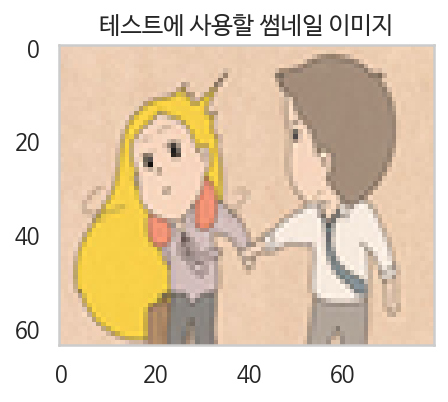

In [35]:
#직접 눈으로 비교할 label숫자 설정
find_i = 2  # 2(퀴퀴한 일기), 3(반지하 셋방), ... 

# X_test
test_img = X_test[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(14,16))
plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = '테스트에 사용할 썸네일 이미지'
plt.title(info2)
clear_output()
plt.show()


In [36]:
# X_test의 find_i에 해당하는 이미지의 각 카테고고리(라벨)에 속할 확률값들을 가져온다
finded = result_df.iloc[find_i,2:]

temp = pd.DataFrame()

# finded 의 인덱스는 각 카테고리 명칭을 수치화 한 숫자들이니까, 이걸 다시 기존 웹툰 제목으로 바꾼다
temp["id"] = le.inverse_transform(list(finded.index))

# 이 각 웹툰에 현재 선택한 이미지인 X_test[find_i]가 속할 확률을 데이터프레임으로 만든거임
temp["proba"] = finded
top10_df = temp.sort_values('proba', ascending=False).head(10)
top10_df

,id,proba
25,퀴퀴한 일기,0.999999
11,반지하셋방,5.51056e-07
27,풀 뜯어먹는 소리,1.99348e-07
23,채널뽁스,1.91269e-07
8,레드스톰,3.5135e-08
9,멀리서 보면 푸른 봄,3.16148e-08
0,공부하는 고양이,7.9814e-09
4,냥냐라냥냥,2.21833e-09
19,유색의 멜랑꼴리,7.99914e-10
12,버닝 이펙트,6.74388e-10


In [0]:
# top10에 해당하는 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re

top10_path_list = []
title_list = []

for idx, row in top10_df.iterrows():  
  title_list.append(row['id'])
  title = row['id']
  # title = row['id'][:-2]    # 웹툰 제목에 특수문자가 들어간 경우 이런식으로 제목 뽑아내기
  regex = re.compile('/content/drive/My Drive/total_img/' + title + '.{0,}')

  for each_dir in x_dir_ls:
    matched_path = regex.findall(each_dir)
    
    if len(matched_path) != 0:
      break

  top10_path_list.append(matched_path[0])

In [44]:
top10_path_list

['/content/drive/My Drive/total_img/퀴퀴한 일기_#260. 이상한 조합.png',
 '/content/drive/My Drive/total_img/반지하셋방_155화 왕따 극복기(9) .png',
 '/content/drive/My Drive/total_img/풀 뜯어먹는 소리_126화 살기좋은 통나무집.png',
 '/content/drive/My Drive/total_img/채널뽁스_67. 공포의 기숙사 (1).png',
 '/content/drive/My Drive/total_img/레드스톰_14화.png',
 '/content/drive/My Drive/total_img/멀리서 보면 푸른 봄_시즌2 55화.png',
 '/content/drive/My Drive/total_img/공부하는 고양이_6화.png',
 '/content/drive/My Drive/total_img/냥냐라냥냥_9.직업.png',
 '/content/drive/My Drive/total_img/유색의 멜랑꼴리_28화 Dark Night.png',
 '/content/drive/My Drive/total_img/버닝 이펙트_155화.png']

In [45]:
title_list

['퀴퀴한 일기',
 '반지하셋방',
 '풀 뜯어먹는 소리',
 '채널뽁스',
 '레드스톰',
 '멀리서 보면 푸른 봄',
 '공부하는 고양이',
 '냥냐라냥냥',
 '유색의 멜랑꼴리',
 '버닝 이펙트']

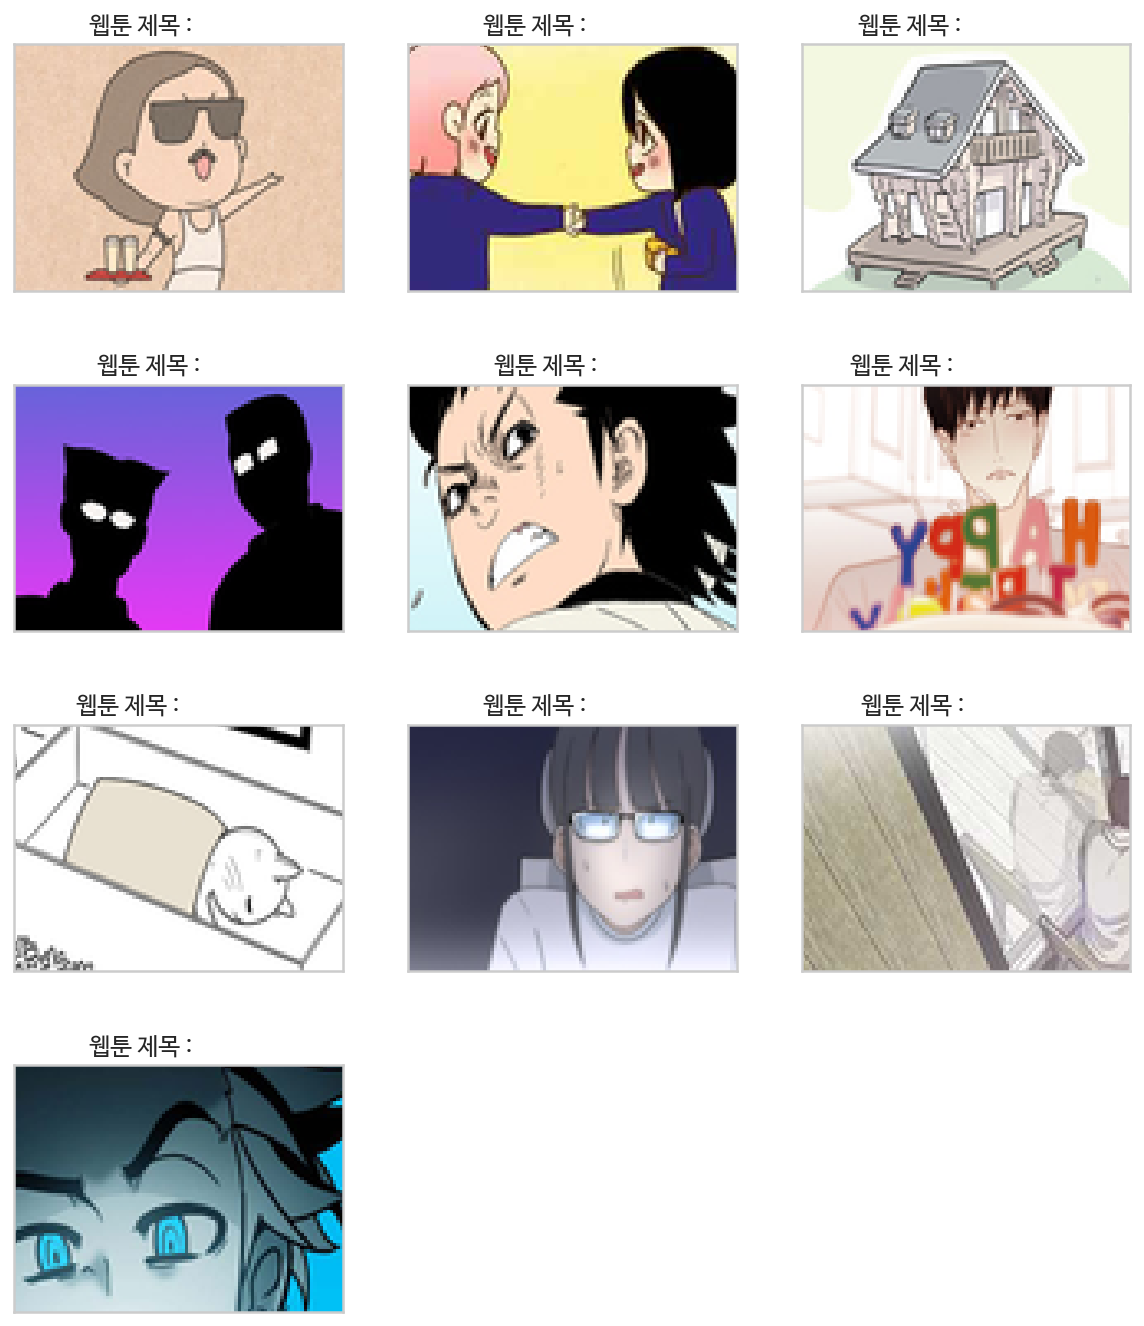

In [82]:
# proba기준 유사한 상위 10개웹툰 나열 --------------------------

i = 0

plt.figure(figsize=(10,12))
for each_path in top10_path_list:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  info = str(title_list[i])
  plt.title('웹툰 제목 : ' + str(title_list[i]), fontsize='medium')
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()

In [84]:
# 네이버 이미지 갖고와서 predict해보기

test_path = '/content/drive/My Drive/test_img/'
v_dir_ls, v_img_file, v_list = getImageFromPath(test_path)

All image path listing complete!


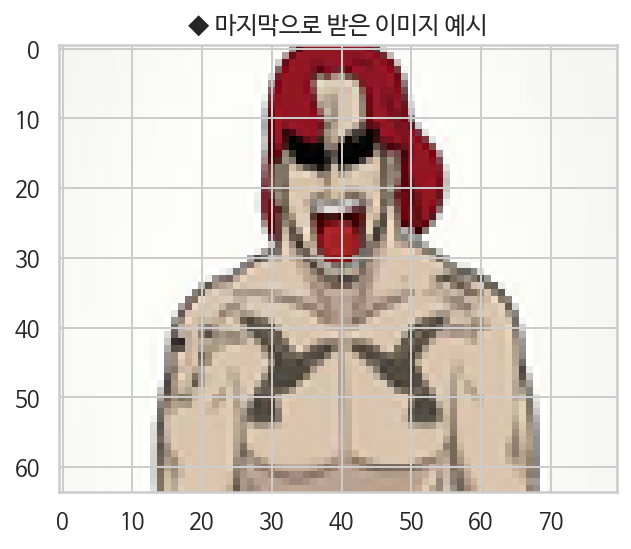

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태▽
(9, 64, 80, 3) float32


In [85]:
V_raw, v_error_imgs = imageToNpArray(v_dir_ls,80,64,"RGB")       # 이미지 path 리스트, 가로px, 세로px, 이미지 모드

In [0]:
# 미리 트레이닝 시켜둔 예측모델 불러오기
from keras.models import load_model

model = load_model("/content/drive/My Drive/Colab Notebooks/daum_thumbnail_model.h5")

In [88]:
# 직접 이미지를 분류모델에 넣어서 proba값 확인

y_pred = model.predict(V_raw, verbose=1)
# print(y_pred)

9/9 [==============================] - 0s 734us/step


In [0]:
label_Y = le.inverse_transform(y_test)

In [90]:
result_df = pd.DataFrame()
result_df['id'] = v_img_file
# result_df['Y_val']=y_test
result_df = pd.concat([result_df, pd.DataFrame(y_pred)],axis=1)
clear_output()
# result_df.tail(10)
# y_test.size
y_pred.shape
print('id목록\n', result_df.id.unique())

(9, 31)

id목록
 ['1초, 시니&광운_1화.png' '8월의 눈보라, 김리아_3화.png'
 '3cm 헌터, 돌연변이_10화.png'
 '9등급 뒤집기, 아백_5화 시립도서관.png'
 '203호 저승사자, 샤니_2부 3. 껌은 종이에 싸서.png'
 '11me, 고지애&영재영_(9). 살 맛 난다.png'
 '가담항설, 랑또_22화.png' '가타부타타, 숭어_2화.png'
 '가슴털 로망스, 갸오오_28화.png']


In [0]:
# result_df

In [0]:
#직접 눈으로 비교할 label숫자 설정

find_i = 2        # 2(3cm 헌터)

# X_test
test_img = V_raw[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

In [0]:
# plt.imshow(test_img)

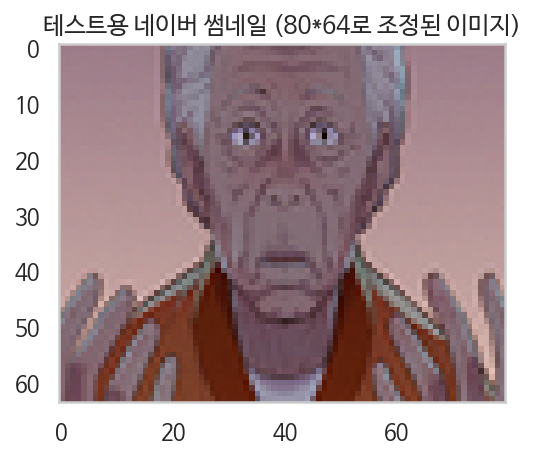

In [105]:
plt.figure(figsize=(4, 6))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = '테스트용 네이버 썸네일 (80*64로 조정된 이미지)'
plt.title(info2)
clear_output()
plt.show()


In [0]:
# 네이버 이미지를 넣었을때, 가장 비슷한 확률값을 가진 웹툰의 이미지 아무거나 10개 가져오기

finded = result_df.iloc[find_i,1:]
temp = pd.DataFrame()
temp["id"] = le.inverse_transform(list(finded.index))
temp["proba"] = finded
top10_df = temp.sort_values('proba', ascending=False).head(10)

In [0]:
# top10_df

In [0]:
# top10에 해당하는 다음 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re

top10_path_list = []
title_list = []

for idx, row in top10_df.iterrows():  
  title_list.append(row['id'])
  # title = row['id']
  title = row['id'][:-2]    # 웹툰 제목에 특수문자가 들어간 경우 이런식으로 제목 뽑아내기
  regex = re.compile('/content/drive/My Drive/total_img/' + title + '.{0,}')

  for each_dir in x_dir_ls:
    matched_path = regex.findall(each_dir)
    
    if len(matched_path) != 0:
      break

  top10_path_list.append(matched_path[0])

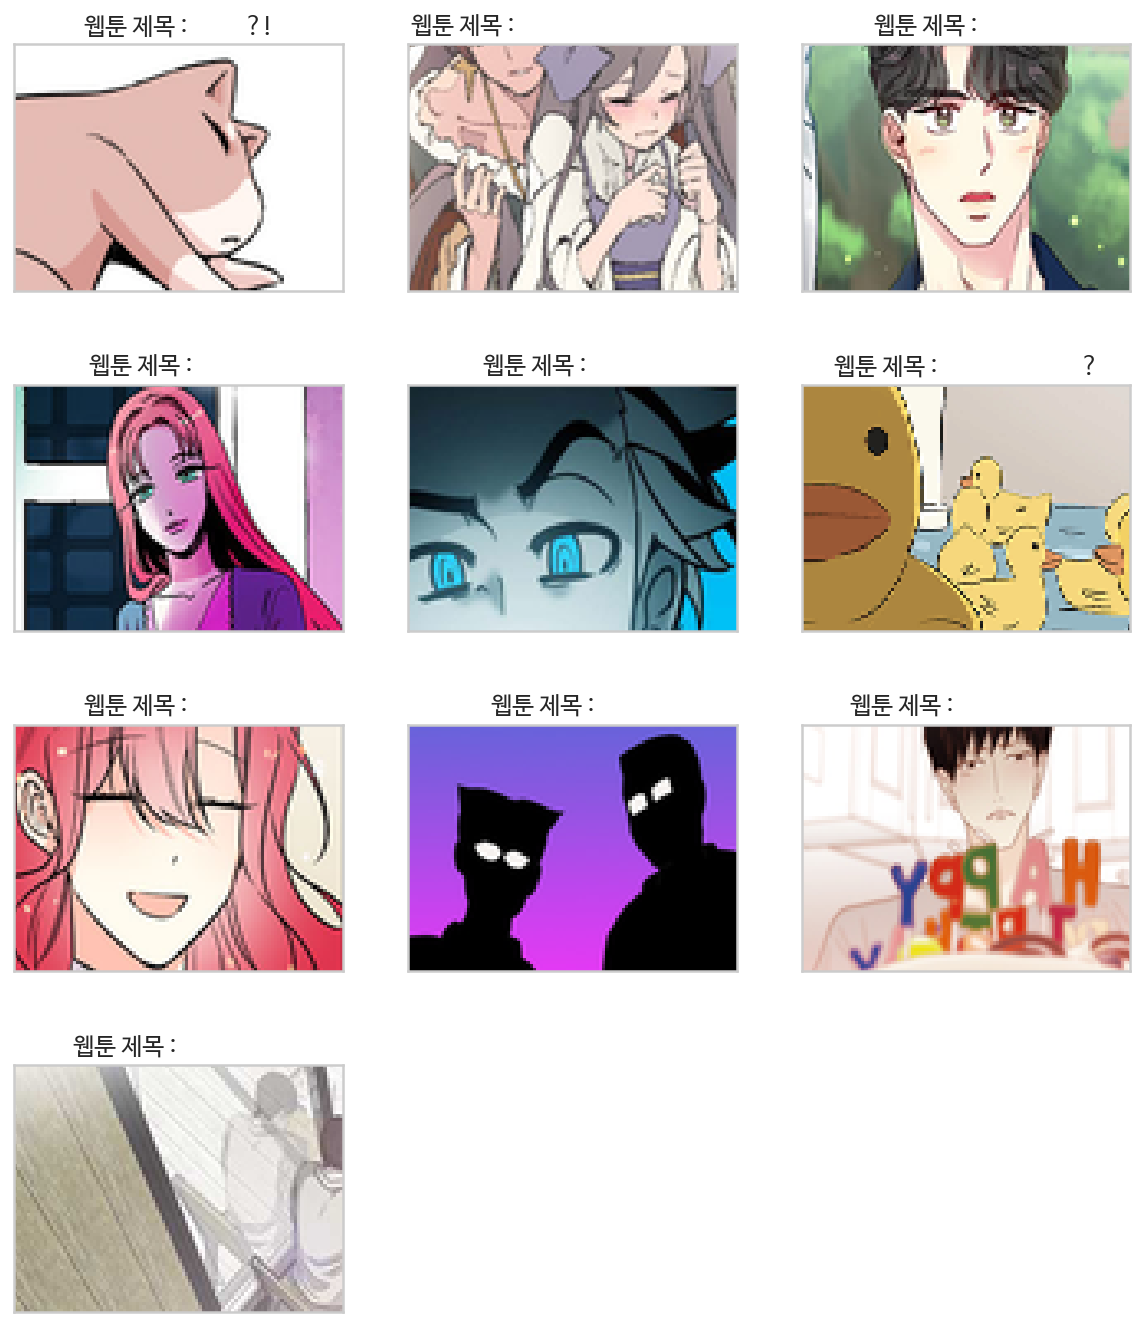

In [110]:
# proba기준 유사한 상위 10개웹툰 나열 --------------------------

i = 0

plt.figure(figsize=(10,12))
for each_path in top10_path_list:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  info = str(title_list[i])
  plt.title('웹툰 제목 : ' + str(title_list[i]), fontsize='medium')
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()